# Exemple d'expérimentation en psychologie
##### https://www.enib.fr/~deloor/materielPedagogique/TP/ExpePsychoStat/

Thomas Cochou


## L'hypothèse nulle

In [1]:
import matplotlib
import matplotlib.pyplot as plt

import random
import math
import numpy as np
import pandas as pd

In [2]:
def openFile(file) :
    num,time,angle,duration,errorX,errorY=[],[],[],[],[],[]
    with open(file, 'r') as f:
        ligne = f.readline()
        ligne = f.readline()
        while(ligne):
            n,t,a,d,eX,eY=ligne.split(';')
            num.append(int(n))
            time.append(float(t))
            duration.append(float(d))
            angle.append(float(a))
            errorX.append(float(eX))
            errorY.append(float(eY)*float(eY))
            ligne=f.readline()
            
    data = {"num": num,
            "time" : time,
            "angle" : angle,
            "duration" : duration,
            "errorX" : errorX,
            "errorY" : errorY}
    
    return data

In [3]:
def afficheResult(data, angle_or_duration):
  
    fig = plt.figure(figsize=(10,10))
    fig.patch.set_facecolor((1,1,1))
    
    if angle_or_duration == "angle" :
        plt.plot(data["angle"],data["errorY"],"g+")
        plt.xlabel("angle")
    else :
        plt.plot(data["duration"],data["errorY"],"g+")
        plt.xlabel("duration")
    
    plt.ylabel("errorY^2")
    plt.show()


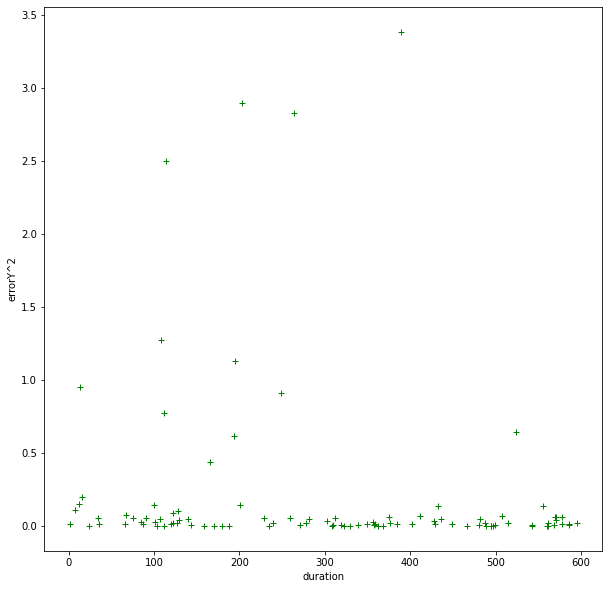

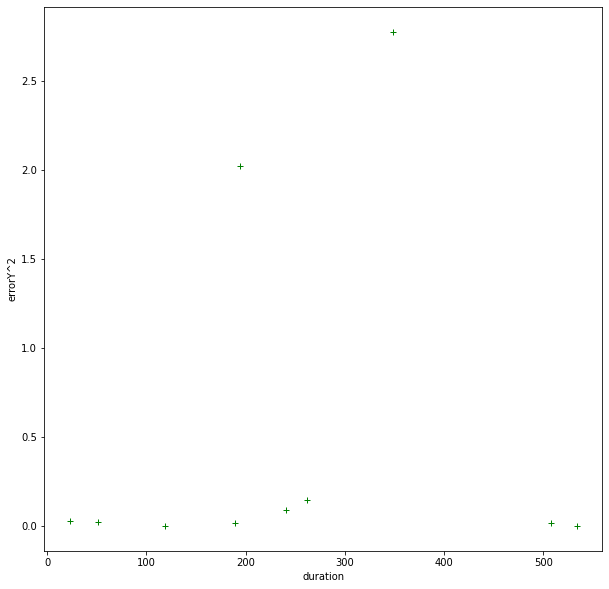

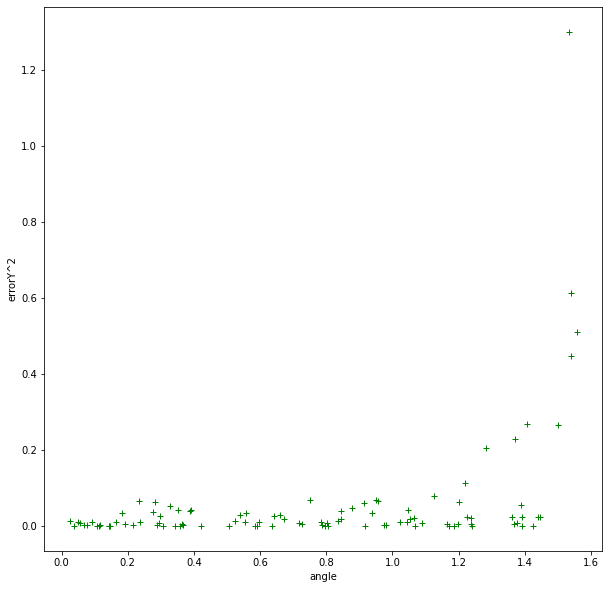

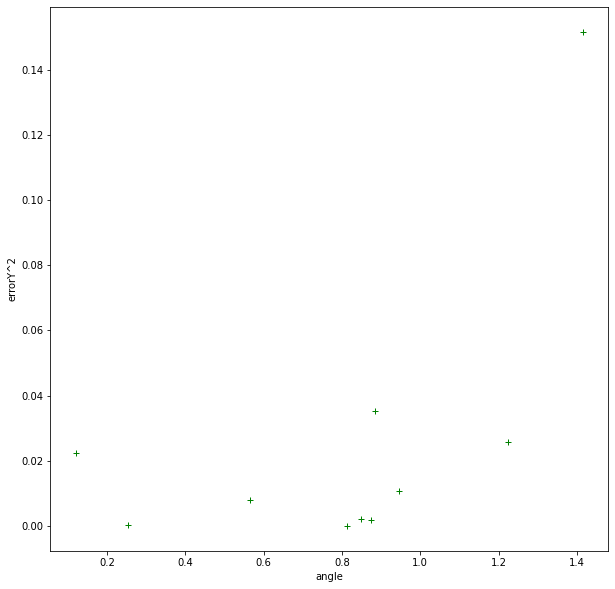

In [4]:
data_duration_100 = openFile('expePsychoResults_exposition_100.csv')
afficheResult(data_duration_100, "duration")
data_duration_10 = openFile('expePsychoResults_exposition_10.csv')
afficheResult(data_duration_10, "duration")
data_angle_100 = openFile('expePsychoResults_angle_100.csv')
afficheResult(data_angle_100, "angle")
data_angle_10 = openFile('expePsychoResults_angle_10.csv')
afficheResult(data_angle_10, "angle")

In [5]:
data_duration_errorY_3 = []
data_duration_duration_3 = []

for i in range(3):
    rand = random.randint(0,len(data_duration_100["errorY"])-1)
    data_duration_errorY_3.append(data_duration_100["errorY"][rand])
    data_duration_duration_3.append(data_duration_100["duration"][rand])


data_angle_errorY_3 = []
data_angle_angle_3 = []

for i in range(3):
    rand = random.randint(0,len(data_angle_100["errorY"])-1)
    data_angle_errorY_3.append(data_angle_100["errorY"][rand])
    data_angle_angle_3.append(data_angle_100["angle"][rand])

    
moy3_expo = np.mean(data_duration_errorY_3)
med3_expo = np.median(data_duration_errorY_3)
moy10_expo = np.mean(data_duration_10["errorY"])
med10_expo = np.median(data_duration_10["errorY"])
moy100_expo = np.mean(data_duration_100["errorY"])
med100_expo = np.median(data_duration_100["errorY"])

moy3_angle = np.mean(data_angle_errorY_3)
med3_angle = np.median(data_angle_errorY_3)
moy10_angle = np.mean(data_angle_10["errorY"])
med10_angle = np.median(data_angle_10["errorY"])
moy100_angle = np.mean(data_angle_100["errorY"])
med100_angle = np.median(data_angle_100["errorY"])

print("ERREUR DURATION")

moy_med_expo = np.array([[moy3_expo,moy10_expo,moy100_expo],[med3_expo,med10_expo,med100_expo]])

columns = ['Duration 3','Duration 10','Duration 100']
index = ['Moyenne','Mediane']

df = pd.DataFrame(data=moy_med_expo,index=index,columns=columns)

print(df)


print("\nERREUR ANGLE")

moy_med_angle = np.array([[moy3_angle,moy10_angle,moy100_angle],[med3_angle,med10_angle,med100_angle]])

columns = ['Angle 3','Angle 10','Angle 100']
index = ['Moyenne','Mediane']

df = pd.DataFrame(data=moy_med_angle,index=index,columns=columns)

print(df)

ERREUR DURATION
         Duration 3  Duration 10  Duration 100
Moyenne    0.037317     0.512558      0.213477
Mediane    0.044049     0.024850      0.021357

ERREUR ANGLE
          Angle 3  Angle 10  Angle 100
Moyenne  0.173919  0.025851   0.055825
Mediane  0.009352  0.009477   0.011316


In [6]:
def MC(errorY, moy):

    ei = (errorY - moy)
    var = np.mean(ei*ei)
    ec = math.sqrt(var)
    cv = ec / np.mean(errorY)
    
    statistical_data_MC = {"var" : var,
                       "ec" : ec,
                       "cv" : cv}
    return statistical_data_MC

In [7]:
data_duration_3_stats_MC = MC(data_duration_errorY_3, moy3_expo)
data_duration_10_stats_MC = MC(data_duration_10["errorY"], moy10_expo)
data_duration_100_stats_MC = MC(data_duration_100["errorY"], moy100_expo)

data_angle_3_stats_MC = MC(data_angle_errorY_3, moy3_angle)
data_angle_10_stats_MC = MC(data_angle_10["errorY"], moy10_angle)
data_angle_100_stats_MC = MC(data_angle_100["errorY"], moy100_angle)


print("STATS MC DURATION")

stats_duration_MC = np.array([[data_duration_3_stats_MC["var"],
                          data_duration_10_stats_MC["var"],
                         data_duration_100_stats_MC["var"]],
                         [data_duration_3_stats_MC["ec"],
                          data_duration_10_stats_MC["ec"],
                          data_duration_100_stats_MC["ec"]],
                         [data_duration_3_stats_MC["cv"],
                         data_duration_10_stats_MC["cv"],
                         data_duration_100_stats_MC["cv"]]])

columns = ['Duration 3','Duration 10','Duration 100']
index = ['Variance','Ecart Type','Coefficient variation']

df = pd.DataFrame(data=stats_duration_MC,index=index,columns=columns)

print(df)


print("\nSTATS MC ANGLE")

stats_angle_MC = np.array([[data_angle_3_stats_MC["var"],
                          data_angle_10_stats_MC["var"],
                         data_angle_100_stats_MC["var"]],
                         [data_angle_3_stats_MC["ec"],
                          data_angle_10_stats_MC["ec"],
                          data_angle_100_stats_MC["ec"]],
                         [data_angle_3_stats_MC["cv"],
                         data_angle_10_stats_MC["cv"],
                         data_angle_100_stats_MC["cv"]]])

columns = ['Angle 3','Angle 10','Angle 100']
index = ['Variance','Ecart Type','Coefficient variation']

df = pd.DataFrame(data=stats_angle_MC,index=index,columns=columns)

print(df)

STATS MC DURATION
                       Duration 3  Duration 10  Duration 100
Variance                 0.000324     0.921971      0.360469
Ecart Type               0.018008     0.960193      0.600391
Coefficient variation    0.482575     1.873336      2.812441

STATS MC ANGLE
                        Angle 3  Angle 10  Angle 100
Variance               0.057122  0.001889   0.025348
Ecart Type             0.239002  0.043467   0.159212
Coefficient variation  1.374216  1.681459   2.851976


#### En comparant ces valeurs pour les trois modèles, que pouvez-vous en conclure ?

Plus le nombre d'échantillon est élevé, plus le coefficient de variation est élevé et donc la dispersion autour de la moyenne est grande.

## Le modèle augmenté

In [8]:
def MA(errorY,angle_or_duration):

    angle_or_duration = np.asarray(angle_or_duration, dtype='float64')
    moyErr = np.mean(errorY)
    moy_Ang_Dur = np.mean(angle_or_duration)
    bt = angle_or_duration - moy_Ang_Dur
    b1 = np.sum(bt*(errorY-moyErr))/np.sum(bt*bt)
    b0 = moyErr - b1 * moy_Ang_Dur
    ei = (errorY - b0 -b1*angle_or_duration)
    var = np.mean(ei*ei)
    ec = math.sqrt(var)
    cv = ec / np.mean(errorY)

    statistical_data_MA = {"moyErr" : moyErr,
                           "moy_Ang_Dur" : moy_Ang_Dur,
                           "b0" : b0,
                           "b1" : b1,
                           "var" : var,
                           "ec" : ec,
                           "cv" : cv
                          }
    
    return statistical_data_MA

In [9]:
data_duration_3_stats_MA = MA(data_duration_errorY_3, data_duration_duration_3)
data_duration_10_stats_MA = MA(data_duration_10["errorY"], data_duration_10["duration"])
data_duration_100_stats_MA = MA(data_duration_100["errorY"], data_duration_100["duration"])

data_angle_3_stats_MA = MA(data_angle_errorY_3, data_angle_angle_3)
data_angle_10_stats_MA = MA(data_angle_10["errorY"], data_angle_10["angle"])
data_angle_100_stats_MA = MA(data_angle_100["errorY"], data_angle_100["angle"])


print("STATS MA DURATION")

stats_duration_MA = np.array([[data_duration_3_stats_MA["var"],
                          data_duration_10_stats_MA["var"],
                         data_duration_100_stats_MA["var"]],
                         [data_duration_3_stats_MA["ec"],
                          data_duration_10_stats_MA["ec"],
                          data_duration_100_stats_MA["ec"]],
                         [data_duration_3_stats_MA["cv"],
                         data_duration_10_stats_MA["cv"],
                         data_duration_100_stats_MA["cv"]]])

columns = ['Duration 3','Duration 10','Duration 100']
index = ['Variance','Ecart Type','Coefficient variation']

df = pd.DataFrame(data=stats_duration_MA,index=index,columns=columns)

print(df)


print("\nSTATS MA ANGLE")

stats_angle_MA = np.array([[data_angle_3_stats_MA["var"],
                          data_angle_10_stats_MA["var"],
                         data_angle_100_stats_MA["var"]],
                         [data_angle_3_stats_MA["ec"],
                          data_angle_10_stats_MA["ec"],
                          data_angle_100_stats_MA["ec"]],
                         [data_angle_3_stats_MA["cv"],
                         data_angle_10_stats_MA["cv"],
                         data_angle_100_stats_MA["cv"]]])

columns = ['Angle 3','Angle 10','Angle 100']
index = ['Variance','Ecart Type','Coefficient variation']

df = pd.DataFrame(data=stats_angle_MA,index=index,columns=columns)

print(df)

STATS MA DURATION
                       Duration 3  Duration 10  Duration 100
Variance                 0.000140     0.911229      0.353523
Ecart Type               0.011819     0.954583      0.594578
Coefficient variation    0.316710     1.862391      2.785213

STATS MA ANGLE
                        Angle 3  Angle 10  Angle 100
Variance               0.000373  0.001276   0.021371
Ecart Type             0.019311  0.035718   0.146187
Coefficient variation  0.111037  1.381717   2.618666


#### En comparant ces valeurs pour les trois modèles, que pouvez-vous en conclure ?

Le modèle devrait être plus fidèle à la réalité, cependant, les différences sont assez minimes.

## La proportion de réduction de l'erreur

In [10]:
def pre(errorY,angle_or_duration,moyErr,b0,b1):
    
    b1xangOrDir = []
    
    eiMC = (errorY - moyErr)
    
    for i in range(len(angle_or_duration)) :
        b1xangOrDir.append(angle_or_duration[i]*b1)
    
    eiMA = (errorY - b0 - b1xangOrDir)
    errMC = np.sum(eiMC*eiMC)
    errMA = np.sum(eiMA*eiMA)
    pre = (errMC - errMA) / errMC
    
    return pre


In [11]:
data_duration_3_pre = pre(data_duration_errorY_3, data_duration_duration_3,data_duration_3_stats_MA["moyErr"],data_duration_3_stats_MA["b0"],data_duration_3_stats_MA["b1"])
data_duration_10_pre = pre(data_duration_10["errorY"], data_duration_10["duration"],data_duration_10_stats_MA["moyErr"],data_duration_10_stats_MA["b0"],data_duration_10_stats_MA["b1"])
data_duration_100_pre = pre(data_duration_100["errorY"], data_duration_100["duration"],data_duration_100_stats_MA["moyErr"],data_duration_100_stats_MA["b0"],data_duration_100_stats_MA["b1"])

data_angle_3_pre = pre(data_angle_errorY_3, data_angle_angle_3,data_angle_3_stats_MA["moyErr"],data_angle_3_stats_MA["b0"],data_angle_3_stats_MA["b1"])
data_angle_10_pre = pre(data_angle_10["errorY"], data_angle_10["angle"],data_angle_10_stats_MA["moyErr"],data_angle_10_stats_MA["b0"],data_angle_10_stats_MA["b1"])
data_angle_100_pre = pre(data_angle_100["errorY"], data_angle_100["angle"],data_angle_100_stats_MA["moyErr"],data_angle_100_stats_MA["b0"],data_angle_100_stats_MA["b1"])

print("STATS MA DURATION")

stats_duration_pre = np.array([[data_duration_3_pre,data_duration_10_pre,data_duration_100_pre]])

columns = ['Duration 3','Duration 10','Duration 100']
index = ['PRE']

df = pd.DataFrame(data=stats_duration_pre,index=index,columns=columns)

print(df)


print("\nSTATS MA ANGLE")

stats_angle_pre = np.array([[data_angle_3_pre, data_angle_10_pre, data_angle_100_pre]])


columns = ['Angle 3','Angle 10','Angle 100']
index = ['PRE']

df = pd.DataFrame(data=stats_angle_pre,index=index,columns=columns)

print(df)

STATS MA DURATION
     Duration 3  Duration 10  Duration 100
PRE    0.569281     0.011651      0.019269

STATS MA ANGLE
      Angle 3  Angle 10  Angle 100
PRE  0.993471  0.324748    0.15692


#### Qu'en déduisez vous ?

Sur  l'échantillon 10 de l'angle, il y a l'air d'y avoir une correlation entre l'influence de l'angle et les erreurs.
Les échantillons de seulement 3 valeurs montrent aussi une correlation mais ils sont trop petits pour l'étude.

## l'ANOVA

* Si vous avez 3 données et un paramètre ajouté, 95% des PRE auront une valeur inférieure à 0.903

Pour l'erreur lié à la duration, la valeur 0.569 est inférieure à 0.903 et par conséquent le modèle augmenté est à rejeter: on garde l'hypothèse nulle.

Pour l'erreur lié à l'angle, la valeur 0.993 est supérieure à 0.903 et par conséquent le modèle compact est à rejeter: on rejete l'hypothèse nulle.

* Si vous avez 10 données et un paramètre ajouté, 95% des PRE auront une valeur inférieure à 0.332

Pour l'erreur lié à la duration, la valeur 0.011 est inférieure à 0.332 et par conséquent le modèle augmenté est à rejeter: on garde l'hypothèse nulle.

Pour l'erreur lié à l'angle, la valeur 0.324 est inférieure à 0.332 et par conséquent le modèle augmenté est à rejeter: on garde l'hypothèse nulle.

* Si vous avez 100 données et un paramètre ajouté, 95% des PRE auront une valeur inférieure à 0.038

Pour l'erreur lié à la duration, la valeur 0.019 est inférieure à 0.038 et par conséquent le modèle augmenté est à rejeter: on garde l'hypothèse nulle.

Pour l'erreur lié à l'angle, la valeur 0.156 est supérieure à 0.038 et par conséquent le modèle compact est à rejeter: on rejete l'hypothèse nulle.

##### Nous avons rejeté 2 modèles compacts sur 6, le bilan est mitigé quand à l'hypothèse selon laquelle l'angle d'inclinaison de la planche ou la duration présentée aux sujets a un impact sur la capacité de ces sujets à replacer la boule au bon endroit lorsque la planche leur est présenté vue de dessue